### Pandas实现SQL功能与数据透视表
前情提要：

- 实现方式不一，可自行更多的探索
- 样例演示可导入cpc.csv执行

####  🧀知识点1：select & from 
| pandas                 | 注释（方法的参数包括但不限于以下，更多参数可自行在jupyter notebook 按shift+tab查看👀 ） | sql |
| :--------------------- | :----- | :----- |
| df.column、df['column'] | 涉及选取多列，需要采用嵌套列表形式[['x','y']] | column |
|df = pd.read_csv('./table_name.csv')<br />df = pd.read_excel('./table_name.xlsx')|**read_csv()**<br />path：指明所需读取表格所在的文件路径。若表格与代码文件在同一文件夹，仅需'./表格名称.csv'。若不在同一文件夹，需要右键表格属性，查看表格路径，在文件路径前加r，如r'C:\Users\dsx\cpc.csv'。<br />sep：分隔符，常见为逗号，如sep=','<br />usecols：返回指定的列，如usecols=['曝光数','进店数']<br />encoding：指定编码格式，如encoding = 'gbk'<br />**read_excel**()<br />sheet_name：指定要读取的sheet，如sheet_name='sheet2'<br />index_col：指定某列为索引，如index_col='日期'<br />usecols：返回指定的列，如usecols=['曝光数','进店数']|from|
|pd.unique(df.column)<br />pd.drop_duplicates()|**unique()**对于单个字段去重，如unique(cpc.日期)<br />**drop_duplicates()**对于多个字段去重，如drop_duplicates(['曝光数','进店数'])。若对于整个DataFrame去重，如cpc.drop_duplicates()|distinct|

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']#设置中文字体为黑体
plt.rcParams['axes.unicode_minus'] = False #正常显示负号
import pymysql
pd.set_option('display.max_rows', 9999)
pd.set_option('display.max_columns', 9999)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

##### 样例演示

In [2]:
# - 1【select】筛选门店名称并且去重
# select distinct(平台门店名称) 
# from ddm.cpc

cpc = pd.read_csv('./cpc.csv',sep = ',',encoding = 'gbk')
#确保代码文件和表格文件在同一路径下
pd.Series(pd.unique(cpc['平台门店名称']))

0           蛙小辣火锅杯（合生汇店）
1        蛙小辣美蛙火锅杯（大宁国际店）
2      蛙小辣·美蛙火锅杯（长风大悦城店）
3      蛙小辣·美蛙火锅杯（虹口足球场店）
4        利芳·一人食大盘鸡(国定路店)
5      蛙小辣·美蛙火锅杯(虹口足球场店)
6         蛙小辣·美蛙火锅杯(宝山店)
7           蛙小辣火锅杯(五角场店)
8         蛙小辣·美蛙火锅杯(真如店)
9        蛙小辣·美蛙火锅杯(龙阳路店)
10        蛙小辣·美蛙火锅杯(大宁店)
11           蛙小辣火锅杯（真如店）
12      蛙小辣美蛙火锅杯（亚龙美食城店）
13       蛙小辣·美蛙火锅杯(芳华路店)
14         蛙小辣火锅杯(龙阳广场店)
15           蛙小辣火锅杯(徐汇店)
16                蛙小辣火锅杯
17           利芳大盘鸡(国定路店)
18        蛙小辣美蛙火锅杯(五角场店)
19        蛙小辣火锅杯（金煌美食城店）
20         蛙小辣美蛙火锅杯(真如店)
21          蛙小辣火锅杯（五角场店）
22           蛙小辣火锅杯（宝山店）
23       蛙小辣火锅杯麻辣烫(五角场店)
24       蛙小辣·美蛙火锅杯(五角场店)
25     蛙小辣·美蛙火锅杯麻辣烫(宝山店)
26    蛙小辣·美蛙火锅杯麻辣烫(五角场店)
27    蛙小辣·美蛙火锅杯麻辣烫（五角场店）
28         拌客干拌麻辣烫(武宁路店)
29        拌客·干拌麻辣烫(武宁路店)
30         拌客干拌麻辣烫（武宁路店）
dtype: object

In [3]:
# - 2【select】筛选出平台门店名称，以及计算下单率
# select 平台门店名称，(门店下单量/门店访问量) as 下单率
# from ddm.cpc

cpc['符号'] = '%'
cpc['下单率'] = (round(cpc.门店下单量/cpc.门店访问量,1)*100).map(str).str.cat( cpc['符号'])
cpc['下单率']
cpc[['平台门店名称','下单率']]
#[['x1','x2']]：select
#cpc：from

,平台门店名称,下单率
0,蛙小辣火锅杯（合生汇店）,20.0%
1,蛙小辣美蛙火锅杯（大宁国际店）,10.0%
2,蛙小辣·美蛙火锅杯（长风大悦城店）,20.0%
3,蛙小辣·美蛙火锅杯（虹口足球场店）,20.0%
4,利芳·一人食大盘鸡(国定路店),20.0%
5,蛙小辣·美蛙火锅杯(虹口足球场店),10.0%
6,蛙小辣·美蛙火锅杯(宝山店),10.0%
7,蛙小辣火锅杯(五角场店),10.0%
8,蛙小辣·美蛙火锅杯(真如店),10.0%
9,蛙小辣·美蛙火锅杯（长风大悦城店）,20.0%


####  🧀知识点2：where条件筛选
| 运算符         | pandas                          | 注释                                                         | sql                            |
| :------------- | :------------------------------ | :----------------------------------------------------------- | :----------------------------- |
| >              | df.query('column>x')            | 通过字符串表达式对列进行筛选                                 | where column > x               |
| =              | df.query('column=x')            |                                                              | where column = x               |
| <              | df.query('column<x')            |                                                              | where column < x               |
| between..and.. | df[df.column.between(x,y)]      | **参数**：<br />**right/left**：左右边界的值，如between(x,y)<br />**inclusive**：确定是否包括边界值，若包括inclusive = True；若不包括，inclusive = False。默认为True | where column between x and y   |
| in             | df[df.column.isin([x,y,z...])]  | 判断指定字段中的值是否包含在所传入的列表当中，并返回一个全为Bool值的Series | where column in (x,y,z...)     |
| not in         | df[~df.column.isin([x,y,z...])] | isnotin()                                                    | where column not in (x,y,z...) |
| is null        | df[df.column.isnull()]          | 检测指定字段的缺失值，若出现Nan，则映射到True值，非空则映射到False。并返回与字段形状相同的Bool值的Series | where column is null           |
| is not null    | df[~df.column.isnull()]         | notna()                                                      | where column is not null       |
| and            | df.query('x<column&column<y')   | python中使用&表示 与                                         | where x<column and column <y   |
| or             | df.query('x<column\|column<y')  | python中使用\|表示 或                                        | where x<column or column <y    |
| not            | 在df前加一个 ~                  | python中使用~表示 非                                         | 放在配合使用的运算符前         |


| 模糊查询 | pandas                            | 注释                                                         | sql                       |
| :-------- | :--------------------------------- | :------------------------------------------------------------ | :------------------------- |
| like     | df[df.column.str.contains('xxx')] | 判断所传入的字符串是否包含在我们指定字段的内容中，并返回与字段形状相同的Bool值的Series<br />**参数**：<br />pat：字符串，如左侧实例<br />case：是否区分pat中的大小写，若区分，则case = True；若不区分，则case = False。默认为True，区分。 | where column like '%xxx%' |
|          | df[df.column.str.startswith('x')] | 判断指定字段的内容是否以传入的字符串为开头，并返回与字段形状相同的Bool值的Series<br />**参数**：<br />pat：字符串，如左侧实例<br /> | where column like 'x%'    |
|          | df[df.column.str.startswith('x')] | 判断指定字段的内容是否以传入的字符串为结尾，并返回与字段形状相同的Bool值的Series<br />**参数**：<br />pat：字符串，如左侧实例<br /> | where column like '%x'    |

##### 样例演示

In [4]:
#样例演示
# - 1【运算符】and：查找gmvroi>7 且 gmvroi<8 的门店ID跟名字
# select  门店ID,平台门店名称
# from    ddm.cpc
# where   gmvroi <8.0
# and     gmvroi >7.0

# - 2【运算符】between and：查找门店gmvroi介于[7,8]的门店ID跟名字
# select 	门店ID,平台门店名称
# from 	ddm.cpc
# where 	gmvroi between 7.0 and 8.0

cpc.query('gmvroi>7.0&gmvroi<8.0')[['门店ID','平台门店名称']]
#query：where
#&：and

,门店ID,平台门店名称
0,8184590,蛙小辣火锅杯（合生汇店）
3,8165842,蛙小辣·美蛙火锅杯（虹口足球场店）
11,8184590,蛙小辣火锅杯（合生汇店）
15,2001104355,蛙小辣·美蛙火锅杯(宝山店)
17,8106681,蛙小辣·美蛙火锅杯（长风大悦城店）
37,8184590,蛙小辣火锅杯（合生汇店）
48,8052557,蛙小辣火锅杯（真如店）
50,8165842,蛙小辣·美蛙火锅杯（虹口足球场店）
58,2001220953,利芳·一人食大盘鸡(国定路店)
65,8052557,蛙小辣火锅杯（真如店）


In [5]:
# - 3【运算符】in：查找门店gmvroi等于[7,8]的门店ID跟名字
# select 	门店ID,平台门店名称
# from 	ddm.cpc
# where 	gmvroi in(7.0,8.0)

cpc[['门店ID','平台门店名称']][cpc.gmvroi.isin([7.0,8.0])]
#cpc[['门店ID','平台门店名称']]：select 门店ID,平台门店名称
#[]内cpc：from
#gmvroi.isin()：where gmvroi in()

,门店ID,平台门店名称
378,8052557,蛙小辣火锅杯（真如店）
488,2001053699,蛙小辣·美蛙火锅杯(大宁店)
1012,8491999,蛙小辣火锅杯（宝山店）
1064,8491999,蛙小辣火锅杯（宝山店）


In [6]:
# - 4【运算符】null：查找门店实收为空的门店ID跟名字
# select 	门店ID,平台门店名称
# from 	ddm.cpc
# where 	门店实收 is null

cpc[['门店ID','平台门店名称']][cpc.门店实收.isnull()]
#cpc[['门店ID','平台门店名称']]：select 门店ID,平台门店名称
#[]内cpc：from
#门店实收.isnull()：where 	门店实收 is null

,门店ID,平台门店名称
306,2001104355,蛙小辣·美蛙火锅杯(宝山店)
332,2000555792,蛙小辣·美蛙火锅杯(虹口足球场店)
805,8491999,蛙小辣火锅杯（宝山店）
806,8491999,蛙小辣火锅杯（宝山店）
807,8491999,蛙小辣火锅杯（宝山店）
808,8491999,蛙小辣火锅杯（宝山店）
809,8491999,蛙小辣火锅杯（宝山店）
810,8491999,蛙小辣火锅杯（宝山店）
1086,2001104355,蛙小辣·美蛙火锅杯麻辣烫(宝山店)


In [7]:
# - 5【模糊查询】like：查找名称带有宝山的门店
# select  distinct(平台门店名称)
# from    ddm.cpc
# where 平台门店名称 like '%宝山%'

pd.Series(cpc['平台门店名称'][cpc.平台门店名称.str.contains('宝山')].unique())
#cpc['平台门店名称']：select 平台门店名称
#[]内cpc：from
#平台门店名称.str.contains('宝山')：平台门店名称 like '%宝山%'
#unique()：distinct
#pd.Series：将结果转换为Series类型

0       蛙小辣·美蛙火锅杯(宝山店)
1          蛙小辣火锅杯（宝山店）
2    蛙小辣·美蛙火锅杯麻辣烫(宝山店)
dtype: object

#### 🧀知识点3：聚合函数、group by&having

| 聚合函数 | pandas            | sql                          |
| :------- | :---------------- | :--------------------------- |
| AGV()    | df.column.mean()  | select avg(column) from df   |
| COUNT()  | df.column.count() | select count(column) from df |
| MAX()    | df.column.max()   | select max(column) from df   |
| MIN()    | df.column.min()   | select min(column) from df   |
| SUM()    | df.column.sum()   | select sum(column) from df   |

| 分组筛选 | pandas                                                       | 注释                                                         | sql                 |
| :------- | :----------------------------------------------------------- | :----------------------------------------------------------- | :------------------ |
| group    | df.groupby('column').agg(列名 = ('values','sum'))<br />df.groupby(['column1','column2']).agg(列名 = ('values','sum')) | **groupby('column')**：指定我们的分组字段<br />**agg()**：聚合函数<br />列名：我们对聚合字段名别名<br />**'value'**：数值型字段的名字<br />**'sum'**：聚合函数的名字，也可以是max、min等 | group by column     |
| having   | df.groupby('column').agg(列名 = ('values','sum')).query('列名>x') | 通过对分组聚合后形成的表格，进行query条件筛选                | having sum(value)>x |

##### 样例演示

In [8]:
# - 1【聚合函数】avg：查找各个门店的平均实收
# select  	平台门店名称,avg(门店实收) as 平均实收
# from    	ddm.cpc
# group by 	平台门店名称

cpc.groupby('平台门店名称').agg(平均实收 = ('门店实收','mean'))
#cpc：from
#groupby('平台门店名称')：group by 平台门店名称
#agg(平均实收 = ('门店实收','mean'))：avg(门店实收) as 平均实收
#最终结果会显示所有提到的字段

,平均实收
平台门店名称,
利芳·一人食大盘鸡(国定路店),1167.085
利芳大盘鸡(国定路店),1003.667
拌客·干拌麻辣烫(武宁路店),1694.323
拌客干拌麻辣烫(武宁路店),798.885
拌客干拌麻辣烫（武宁路店）,1407.018
蛙小辣·美蛙火锅杯(五角场店),422.050
蛙小辣·美蛙火锅杯(大宁店),505.522
蛙小辣·美蛙火锅杯(宝山店),957.794
蛙小辣·美蛙火锅杯(真如店),766.085


In [9]:
# - 2【分组筛选】having：查找实收>10k的门店名称 与 实收，按实收降序
# select  	平台门店名称,sum(门店实收)
# from    	ddm.cpc
# group by 	平台门店名称
# having      sum(门店实收)>10000
# order by    sum(门店实收) desc 

cpc.groupby('平台门店名称').agg(总合 = ('门店实收','sum')).query('总合>10000').sort_values(by = '总合',ascending=False)
#cpc:from
#groupby('平台门店名称'):group by 平台门店名称
#agg(总合 = ('门店实收','sum')):sum(门店实收)
#query('总合>10000'):having sum(门店实收)>10000
#sort_values(by = '总合',ascending=False):order by sum(门店实收) desc 

,总合
平台门店名称,
拌客·干拌麻辣烫(武宁路店),140628.830
蛙小辣·美蛙火锅杯(宝山店),101526.140
蛙小辣火锅杯(五角场店),99578.180
蛙小辣·美蛙火锅杯(虹口足球场店),71286.210
蛙小辣火锅杯（宝山店）,71009.660
蛙小辣·美蛙火锅杯麻辣烫(宝山店),64722.170
利芳·一人食大盘鸡(国定路店),51351.750
蛙小辣·美蛙火锅杯(真如店),44432.920
蛙小辣·美蛙火锅杯（虹口足球场店）,43977.250


#### 🧀知识点4：order by

| 排序 | pandas                                          | 注释                                                         | sql                  |
| :--- | :---------------------------------------------- | :----------------------------------------------------------- | :------------------- |
| 正序 | df.sort_values(by = 'column',ascending = True)  | 参数：<br />by：选择排序依据的字段。若需要依据多列，则：['x1','x2']。<br />ascending：选择排序方式。若正序，则：ascending=True；若倒序，则：ascending=True | order by column asc  |
| 倒序 | df.sort_values(by = 'column',ascending = False) |                                                              | order by column desc |

##### 样例演示

In [10]:
# - 1【排序】order by：查看每个“武宁路”门店的实收，按实收降序
# select 		平台门店名称,sum(门店实收)
# from		ddm.cpc
# where 		平台门店名称 like '%武宁路%'
# group by 	平台门店名称
# order by 	sum(门店实收) desc

x = cpc[cpc.平台门店名称.str.contains('武宁路')]
x.groupby(cpc.平台门店名称).agg(实收 = ('门店实收','sum')).sort_values(by='实收',ascending = False)
#代码较长，采用两段的形式讲解
#cpc.平台门店名称.str.contains('武宁路'):where 平台门店名称 like '%武宁路%'
#groupby(cpc.平台门店名称):group by 平台门店名称
#sort_values(by='实收',ascending = False):order by sum(门店实收) desc
#agg(实收 = ('门店实收','sum')):sum(门店实收)

,实收
平台门店名称,
拌客·干拌麻辣烫(武宁路店),140628.830
拌客干拌麻辣烫（武宁路店）,36582.480
拌客干拌麻辣烫(武宁路店),1597.770


#### 🧀 知识点5：limit

| 限制              | pandas     | 注释             | sql               |
| :---------------- | :--------- | :--------------- | :---------------- |
| limit x           | df.head(x) | 取前x行          | limit x           |
| limit x,y         | df[x:y]    | 跳过前x行，取y行 | limit x,y         |
| limit x offsets y | df[x:y]    | 跳过前x行，取y行 | limit x offsets y |

##### 样例演示

In [11]:
# - 习题1【LIMIT】limit x,y：跳过前5行，显示5条数据
# select 	*
# from 	ddm.cpc
# limit 	5,5

cpc[5:10]

,updateTime,平台i,门店ID,平台门店名称,日期,cpc单次点击费用,cpc总费用,cpc曝光量,cpc访问量,gmvroi,下单转换率,单均gmv,单均实收,实收roi,无效订单,有效订单,自增主键,自然曝光量,自然访问量,门店下单量,门店实收,门店曝光量,门店营业额,门店访问量,符号,下单率
5,2019/12/12 11:54,饿了么,2000555792,蛙小辣·美蛙火锅杯(虹口足球场店),2019-12-10,1.610,207.800,1628,129,3.170,0.090,56.100,18.200,1.030,0.000,32.000,1502706,802.000,223.000,32.000,582.440,2430.000,1795.340,352.000,%,10.0%
6,2019/12/12 11:54,饿了么,2001104355,蛙小辣·美蛙火锅杯(宝山店),2019-12-10,1.250,198.500,2043,159,6.520,0.130,64.650,25.620,2.580,0.000,54.000,1502736,1108.000,254.000,52.000,1383.310,3151.000,3491.020,413.000,%,10.0%
7,2019/12/12 11:54,饿了么,2000507076,蛙小辣火锅杯(五角场店),2019-12-10,1.350,166.400,1705,123,6.400,0.150,57.810,21.280,2.360,1.000,63.000,1502967,1470.000,284.000,61.000,1340.470,3175.000,3642.100,407.000,%,10.0%
8,2019/12/12 11:54,饿了么,2001020019,蛙小辣·美蛙火锅杯(真如店),2019-12-10,1.510,140.300,1376,93,4.820,0.140,53.450,14.660,1.320,0.000,46.000,1502987,1394.000,245.000,46.000,674.160,2770.000,2458.600,338.000,%,10.0%
9,2019/12/12 12:49,美团,8106681,蛙小辣·美蛙火锅杯（长风大悦城店）,2019-12-09,1.400,195.350,2329,140,6.870,0.200,47.130,17.200,2.510,3.000,63.000,1503654,839.000,160.000,61.000,1083.590,3168.000,2969.080,300.000,%,20.0%


In [12]:
# - 习题2【LIMIT】查找门店平均实收>1K的门店名称与平均实收，显示前10条数据，结构按照平均实收降序
# select 		平台门店名称,avg(门店实收) as 平均实收
# from		ddm.cpc
# group by 	平台门店名称
# having      平均实收 > 1000
# order by 	平均实收 desc
# limit       5

cpc.groupby('平台门店名称').agg(平均实收 = ('门店实收','mean')).query('平均实收>1000').sort_values(by = '平均实收',ascending=False).head(5)
#cpc:from ddm.cpc
#groupby('平台门店名称'):group by 平台门店名称
#order by 平均实收 desc:query('平均实收>1000')
#sort_values(by = '平均实收',ascending=False):order by 	平均实收 desc
#head(5):limit 5
#agg(平均实收 = ('门店实收','mean')):avg(门店实收) as 平均实收

,平均实收
平台门店名称,
拌客·干拌麻辣烫(武宁路店),1694.323
拌客干拌麻辣烫（武宁路店）,1407.018
蛙小辣火锅杯,1372.333
蛙小辣火锅杯(五角场店),1310.239
蛙小辣美蛙火锅杯(五角场店),1227.000


#### 🧀 知识点6：子查询

```python
#先做出子查询的筛选条件
a = df1.query("value1==x")['value1']
#再将我们的条件放入isin()方法中
b = df2['column'][df2['value2'].isin(a)]
```

```sql
select column from df2
where value2 in (select value1 from df1
                where value1 = x)
```

##### 样例演示

In [13]:
# - 1：查找实收（cpc.csv）>1K的门店名称
# select  distinct 平台门店名称
# from    ddm.cpc
# where   门店ID
# in
#     (
#     select  门店ID
#     from    ddm.cpc
#     where   门店实收>1000
#     )

a = cpc.query('门店实收>1000').门店ID					#子查询条件a:门店实收>1k的门店ID
b = cpc['平台门店名称'][cpc['门店ID'].isin(a)].unique()	#将条件放入isin()当中
pd.Series(b)

0           蛙小辣火锅杯（合生汇店）
1        蛙小辣美蛙火锅杯（大宁国际店）
2      蛙小辣·美蛙火锅杯（长风大悦城店）
3      蛙小辣·美蛙火锅杯（虹口足球场店）
4        利芳·一人食大盘鸡(国定路店)
5      蛙小辣·美蛙火锅杯(虹口足球场店)
6         蛙小辣·美蛙火锅杯(宝山店)
7           蛙小辣火锅杯(五角场店)
8         蛙小辣·美蛙火锅杯(真如店)
9            蛙小辣火锅杯（真如店）
10      蛙小辣美蛙火锅杯（亚龙美食城店）
11                蛙小辣火锅杯
12           利芳大盘鸡(国定路店)
13        蛙小辣美蛙火锅杯(五角场店)
14        蛙小辣火锅杯（金煌美食城店）
15         蛙小辣美蛙火锅杯(真如店)
16          蛙小辣火锅杯（五角场店）
17       蛙小辣火锅杯麻辣烫(五角场店)
18       蛙小辣·美蛙火锅杯(五角场店)
19     蛙小辣·美蛙火锅杯麻辣烫(宝山店)
20    蛙小辣·美蛙火锅杯麻辣烫(五角场店)
21    蛙小辣·美蛙火锅杯麻辣烫（五角场店）
22         拌客干拌麻辣烫(武宁路店)
23        拌客·干拌麻辣烫(武宁路店)
24         拌客干拌麻辣烫（武宁路店）
dtype: object

#### 🧀 知识点7：表连接

| Pandas | 注释                                                         | sql  |
| :----- | :----------------------------------------------------------- | :--- |
| merge  | merge对标我们的sql的join语句<br />left,right首先传入我们需要进行连接的两表名称<br />left/right on：其次选择左右两表的连接字段<br />how：最后选择连接方式<br /> | join |

###### 左连接

```python
df3=pd.merge(df1,df2,left_on='column1',right_on='column2',how = 'left')
```

```sql
select * from df
left join df2
on df1.column1 = df2.column2
```

```python
df3=pd.merge(df1,df2,left_on=['df1_column1,df1_column2'],right_on=['df2_column1','df2_column2'],how = 'left')
```

##### 样例演示

In [14]:
shop = pd.read_csv('./shop.csv',encoding='gbk')
# - 1【内连接】：查看门店名称（shop）的实收（cpc）（连接字段：门店ID）
# select 		s.门店名称
# 			,sum(c.门店实收)
# from 		ddm.cpc c
# join 		ddm.shop s
# on 			c.门店ID = s.门店ID
# group by 	s.门店名称
M = pd.merge(cpc,shop,left_on = '门店ID',right_on = '门店ID',how = 'inner')
M.groupby(['门店名称']).agg(门店实收 = ('门店实收','sum'))
#代码较长，分为两段
#pd.merge:join
#cpc,shop:from cpc join shop
#left_on:左表cpc连接字段
#right_on:右表shop连接字段
#how = 'inner':(inner) join
#groupby(['门店名称']):group by s.门店名称

,门店实收
门店名称,
五角场店,156247.320
宝山店,13973991.240
怒江路店,133033.320
拌客干拌麻辣烫(武宁路店),10907353.880


In [15]:
# - 2 继续题1，采用2个连接字段：门店ID与日期
# select 		s.门店名称
# 			,sum(c.门店实收)
# from 		ddm.cpc c
# join 		ddm.shop s
# on 			c.门店ID = s.门店ID
# and			c.日期 = s.日期
# group by 	s.门店名称

M = pd.merge(cpc,shop,left_on = ['门店ID','日期'],right_on = ['门店ID','日期'],how = 'inner')
M.groupby(['门店名称']).agg(门店实收 = ('门店实收','sum'))

,门店实收
门店名称,
宝山店,43150.250
拌客干拌麻辣烫(武宁路店),129332.680


#### 🧀知识点9：窗口函数

- 1，分组聚合

```python
df['sum_value'] = df.groupby('column')['value'].transform('sum')
#goupby:partition by
#transform:能够输出与DataFrame行数相同的聚合；
```

```sql
select column,value,
	sum(value) over(partition by column) as sum_value
```

- 2，分组排名

```python
df['dense_rank'] = df.groupby('column')['value'].rank(ascending = False,method = 'dense')
#method = 'min':rank()
#method = 'dense':dense_rank()
#method = 'first':row_number()
#rank:1,2,2,4
#dense_rank:1,2,2,3
```

```sql
select column,value,
	dense_rank(value) over(partition by column order by value desc) as dense_rank
```

In [16]:
# - 1：每一天/不同门店的/门店实收排名，采用日期、门店实收正序输出
# select  日期
#         ,平台门店名称
#         ,门店实收
#         ,rank() over (partition by 日期 order by 门店实收 desc) as rankk
# from    ddm.cpc
# order by 日期,门店实收 desc

cpc['rank'] = cpc.groupby('日期')['门店实收'].rank(method = 'min',ascending=False)
#这里相当于rank() over (partition by 日期 order by 门店实收 desc) as rankk

cpc.sort_values(by = ['日期','门店实收'],ascending=[True,False])[['日期','平台门店名称','门店实收','rank']]
#sort_values(by = ['日期','门店实收'],ascending=[True,False]):order by 日期,门店实收 desc
#[['日期','平台门店名称','门店实收','rank']]:select  日期,平台门店名称,门店实收,rankk

cpc['rank'] = cpc.groupby(['日期','平台i'])['门店实收'].rank(method = 'min',ascending=False)
cpc

,updateTime,平台i,门店ID,平台门店名称,日期,cpc单次点击费用,cpc总费用,cpc曝光量,cpc访问量,gmvroi,下单转换率,单均gmv,单均实收,实收roi,无效订单,有效订单,自增主键,自然曝光量,自然访问量,门店下单量,门店实收,门店曝光量,门店营业额,门店访问量,符号,下单率,rank
0,2019/12/12 11:54,美团,8184590,蛙小辣火锅杯（合生汇店）,2019-12-10,1.300,225.650,2711,173,7.430,0.170,57.480,19.800,2.560,0.000,59.000,1501603,1427.000,159.000,56.000,1167.970,4138.000,3391.380,332.000,%,20.0%,2.000
1,2019/12/12 11:54,美团,8223184,蛙小辣美蛙火锅杯（大宁国际店）,2019-12-10,1.540,261.100,3665,169,4.300,0.130,52.990,18.880,1.530,0.000,35.000,1501605,11.000,86.000,32.000,660.730,3676.000,1854.760,255.000,%,10.0%,4.000
2,2019/12/12 11:54,美团,8106681,蛙小辣·美蛙火锅杯（长风大悦城店）,2019-12-10,1.380,177.500,2115,129,6.750,0.180,51.490,20.380,2.670,1.000,53.000,1502265,874.000,165.000,53.000,1080.310,2989.000,2728.720,294.000,%,20.0%,3.000
3,2019/12/12 11:54,美团,8165842,蛙小辣·美蛙火锅杯（虹口足球场店）,2019-12-10,1.470,240.300,2937,164,7.430,0.190,56.350,19.250,2.540,2.000,64.000,1502274,614.000,162.000,63.000,1231.860,3551.000,3606.100,326.000,%,20.0%,1.000
4,2019/12/12 11:54,饿了么,2001220953,利芳·一人食大盘鸡(国定路店),2019-12-10,1.550,623.500,4190,401,5.350,0.170,49.690,12.710,1.370,0.000,132.000,1502523,1872.000,387.000,132.000,1677.960,6062.000,6558.490,788.000,%,20.0%,1.000
5,2019/12/12 11:54,饿了么,2000555792,蛙小辣·美蛙火锅杯(虹口足球场店),2019-12-10,1.610,207.800,1628,129,3.170,0.090,56.100,18.200,1.030,0.000,32.000,1502706,802.000,223.000,32.000,582.440,2430.000,1795.340,352.000,%,10.0%,5.000
6,2019/12/12 11:54,饿了么,2001104355,蛙小辣·美蛙火锅杯(宝山店),2019-12-10,1.250,198.500,2043,159,6.520,0.130,64.650,25.620,2.580,0.000,54.000,1502736,1108.000,254.000,52.000,1383.310,3151.000,3491.020,413.000,%,10.0%,2.000
7,2019/12/12 11:54,饿了么,2000507076,蛙小辣火锅杯(五角场店),2019-12-10,1.350,166.400,1705,123,6.400,0.150,57.810,21.280,2.360,1.000,63.000,1502967,1470.000,284.000,61.000,1340.470,3175.000,3642.100,407.000,%,10.0%,3.000
8,2019/12/12 11:54,饿了么,2001020019,蛙小辣·美蛙火锅杯(真如店),2019-12-10,1.510,140.300,1376,93,4.820,0.140,53.450,14.660,1.320,0.000,46.000,1502987,1394.000,245.000,46.000,674.160,2770.000,2458.600,338.000,%,10.0%,4.000
9,2019/12/12 12:49,美团,8106681,蛙小辣·美蛙火锅杯（长风大悦城店）,2019-12-09,1.400,195.350,2329,140,6.870,0.200,47.130,17.200,2.510,3.000,63.000,1503654,839.000,160.000,61.000,1083.590,3168.000,2969.080,300.000,%,20.0%,2.000


####  🧀知识点10：实现Excel的数据透视表

```python
table = pd.pivot_table(df, values = ['value'], index = ['column1','column2'], columns = ['column3'], aggfunc = np.num,margins=True)
#1、df:选择待处理的DataFrame，对应Excel的框选操作，若只想筛选部分字段，则df[['column1','column2','column3','values']]
#2、value:选择我们要聚合的数值字段 ，对应Excel中的值
#3、index:选择我们的索引（行标签），对应Excel的行
#4、columns:选择我们的列字段，对应Excel的列
#5、aggfunc:选择聚合函数
#6、margins:选择是否添加行&列的小计
```

In [17]:
# - 1：各个门店在不同平台的商家实收
table = pd.pivot_table(cpc, values = ['门店实收','cpc总费用'], index = ['平台门店名称'], columns = ['平台i'], aggfunc = np.sum).fillna(0)
table

cpc总费用                门店实收           
平台i                      美团       饿了么        美团        饿了么
平台门店名称                                                    
利芳·一人食大盘鸡(国定路店)       0.000 16738.510     0.000  51351.750
利芳大盘鸡(国定路店)           0.000 11198.710     0.000  24088.000
拌客·干拌麻辣烫(武宁路店)        0.000 19624.310     0.000 140628.830
拌客干拌麻辣烫(武宁路店)         0.000   510.900     0.000   1597.770
拌客干拌麻辣烫（武宁路店）      6939.660     0.000 36582.480      0.000
蛙小辣·美蛙火锅杯(五角场店)       0.000   423.060     0.000   4220.500
蛙小辣·美蛙火锅杯(大宁店)        0.000  2085.300     0.000   9099.400
蛙小辣·美蛙火锅杯(宝山店)        0.000  9898.120     0.000 101526.140
蛙小辣·美蛙火锅杯(真如店)        0.000  6027.460     0.000  44432.920
蛙小辣·美蛙火锅杯(芳华路店)       0.000     3.600     0.000    152.650
蛙小辣·美蛙火锅杯(虹口足球场店)     0.000 13372.700     0.000  71286.210
蛙小辣·美蛙火锅杯(龙阳路店)       0.000   538.000     0.000   1607.480
蛙小辣·美蛙火锅杯麻辣烫(五角场店)    0.000   312.210     0.000   4866.630
蛙小辣·美蛙火锅杯麻辣烫(宝山店)     0.000  5786.460     0.000  64722.170
蛙小辣·美蛙火锅杯麻辣烫（五角场店）    4.200     0.000   297.900      0.000
蛙小辣·美蛙火锅杯（虹口足球场店）  8682.990     0.000 43977.250      0.000
蛙小辣·美蛙火锅杯（长风大悦城店）  5216.900     0.000 33258.330      0.000
蛙小辣火锅杯             1567.010     0.000  8234.000      0.000
蛙小辣火锅杯(五角场店)          0.000 10190.150     0.000  99578.180
蛙小辣火锅杯(徐汇店)           0.000    74.100     0.000    354.340
蛙小辣火锅杯(龙阳广场店)         0.000  1951.830     0.000   7486.000
蛙小辣火锅杯麻辣烫(五角场店)       0.000     5.800     0.000    263.390
蛙小辣火锅杯（五角场店）        364.240   649.200  3108.130   4642.000
蛙小辣火锅杯（合生汇店）       7307.620     0.000 35655.800      0.000
蛙小辣火锅杯（宝山店）        9903.300     0.000 71009.660      0.000
蛙小辣火锅杯（真如店）        1765.970   298.400 16258.930    939.000
蛙小辣火锅杯（金煌美食城店）      683.240     0.000  2505.000      0.000
蛙小辣美蛙火锅杯(五角场店)        0.000  1156.700     0.000   7362.000
蛙小辣美蛙火锅杯(真如店)         0.000   580.500     0.000   1468.000
蛙小辣美蛙火锅杯（亚龙美食城店）   4745.210     0.000 17460.440      0.000
蛙小辣美蛙火锅杯（大宁国际店）    3909.500     0.000 12421.580      0.000

####  🧀知识点11：表格的合并
##### 核心思路都是采用循环，逐个拼接表格

In [18]:
#当想要合并不同的Excel表格（注意，要保证每个Excel表格的字段相同哦）
import numpy as np
import pandas as pd
import os

path = './合并测试/'							#1、path:选择Excel表格所在路径
files = [i for i in os.listdir(path)]			#2、files = []:创建一个空列表，将路径中，文件or文件夹的名字装入列表
print(files)									#3、查看是否正确，如：['test1','test2']

Merge = pd.DataFrame()							#4、创建一个空的DataFrame
for i in files:									#5、for:循环遍历我们的名称列表(2)，
    df = pd.read_excel(path+i)				  #6、read_excel(path+i):读取第files[i]份表格。如当i=0,files[0]='sheet1'
    Merge = pd.concat([Merge,df])				#7、concat:将df内容拼接至Merge内
Merge.to_excel(path+'合并工作簿.xlsx',index = None)	#8、to_excel:遍历结束后，输出我们的Merge表格
print("合并成功")

['表1.xlsx', '表2.xlsx']
合并成功


In [19]:
#当想要合并同一张Excel表格内的所有sheet（注意，要保证每个sheet的字段相同哦）
import numpy as np
import pandas as pd  
import os

name_list = pd.ExcelFile('./合并测试/表1.xlsx')       #1、ExcelFile:传入Excel表格，表名替换“表1”
df_list = pd.DataFrame()						  #2、创建一个空DataFrame
for sheet in name_list.sheet_names:		       #3、for:循环遍历我们的名称列表(1)
    df = name_list.parse(sheet_name=sheet)    #4、name_list的属性parse:读取sheet中的内容
    df_list=pd.concat([df_list,df]) 		   #5、append:我们将读取到的sheet内容，附加到df_list中
df_list.to_excel('./合并测试/合并工作表.xlsx',index=False)    #6、将df_list中的内容按行合并，输出


#ExcelFile()：传入一个表格的路径，并赋予一个对象。
#sheet_names：他是ExcelFile()的一个方法，将Excel子工作表的名字以列表形式返回
#parse：他是ExcelFile()的一个方法
#参数sheet_name：传入子工作表的名称，可以读取里面的内容
print("合并成功")

合并成功


 #### 🧀 知识点12：pandas基础图表

| 图形   | 方法 .plot                                    |
| :----- | :-------------------------------------------- |
| 折线图 | df.plot(x = 'columns',y = 'coliumns2')        |
| 直方图 | df.plot.hist()                                |
| 条形图 | df.plot.barh(x = 'columns',y = 'coliumns2)    |
| 饼图   | df.plot.pie()                                 |
| 散点图 | df.plot.scatter(x = 'columns',y = 'coliumns2) |
| 箱线图 | df.plot.box()                                 |

:zap: 注意，DataFrame的plot属性，拥有众多参数可满足我们基础的绘图需求，具体可参考：https://blog.csdn.net/h_hxx/article/details/90635650
**若需要添加数据标签、解决中文乱码等，则需要调用matplotlib**

#####  样例演示

<AxesSubplot:xlabel='日期'>

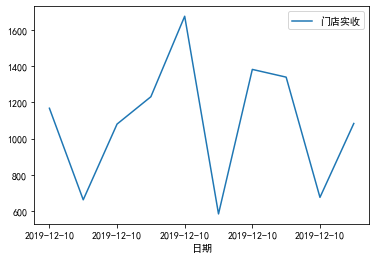

In [20]:
df = cpc.head(10)
df.plot(x = '日期',y = '门店实收')#折现图

<AxesSubplot:ylabel='Frequency'>

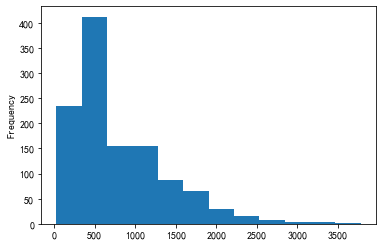

In [21]:
df = cpc.门店实收
df.plot.hist(bins=12)#直方图

<AxesSubplot:ylabel='平台门店名称'>

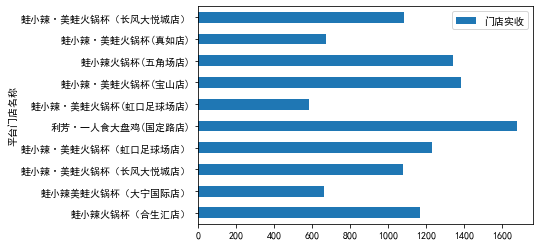

In [22]:
df = cpc.head(10)
df.plot.barh(x = '平台门店名称',y = '门店实收')#条形图

<AxesSubplot:xlabel='日期', ylabel='门店实收'>

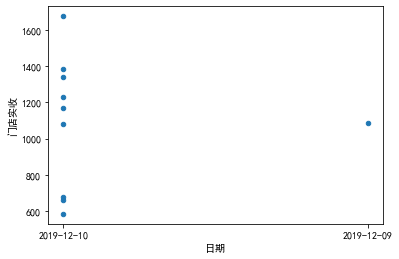

In [23]:
df = cpc.head(10)
df.plot.scatter(x = '日期',y = '门店实收')#散点图

 ####  🧀知识点13：数据探索处理

In [24]:
# - 0、数据准备：导入pandas库&数据
import numpy as np
import pandas as pd
    #导入我们需要的包，并且给它起别名，方便我们调用

df = pd.read_csv('./cpc.csv',encoding='gbk') 
    #df--给我们导入的数据命名为df
    #pd--调用pandas
    #read_csv()--pandas常用的读取数据函数
    #('文件名')--需要导入的数据文件名

In [25]:
# - 1、了解数据
df.info() #了解数据框架--我们数据的行列、字段的类别等概况
    #rangeIndex--数据总体的行数
    #data columns--数据总体的字段
    #int64/object/float64...--字段数据类型，object可理解为字符串
    #xxx non-null--非空的记录数

df.head() #了解详细数据
    #可以看到我们表格内具体的数据内容
    #head()--括号内不加参数，默认为5，即显示5行

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1177 entries, 0 to 1176
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   updateTime  1177 non-null   object 
 1   平台i         1177 non-null   object 
 2   门店ID        1177 non-null   int64  
 3   平台门店名称      1177 non-null   object 
 4   日期          1177 non-null   object 
 5   cpc单次点击费用   1165 non-null   float64
 6   cpc总费用      1177 non-null   float64
 7   cpc曝光量      1177 non-null   int64  
 8   cpc访问量      1177 non-null   int64  
 9   gmvroi      1177 non-null   float64
 10  下单转换率       1177 non-null   float64
 11  单均gmv       1177 non-null   float64
 12  单均实收        1177 non-null   float64
 13  实收roi       1177 non-null   float64
 14  无效订单        1168 non-null   float64
 15  有效订单        1168 non-null   float64
 16  自增主键        1177 non-null   int64  
 17  自然曝光量       1165 non-null   float64
 18  自然访问量       1165 non-null   float64
 19  门店下单量       1165 non-null  

,updateTime,平台i,门店ID,平台门店名称,日期,cpc单次点击费用,cpc总费用,cpc曝光量,cpc访问量,gmvroi,下单转换率,单均gmv,单均实收,实收roi,无效订单,有效订单,自增主键,自然曝光量,自然访问量,门店下单量,门店实收,门店曝光量,门店营业额,门店访问量
0,2019/12/12 11:54,美团,8184590,蛙小辣火锅杯（合生汇店）,2019-12-10,1.300,225.650,2711,173,7.430,0.170,57.480,19.800,2.560,0.000,59.000,1501603,1427.000,159.000,56.000,1167.970,4138.000,3391.380,332.000
1,2019/12/12 11:54,美团,8223184,蛙小辣美蛙火锅杯（大宁国际店）,2019-12-10,1.540,261.100,3665,169,4.300,0.130,52.990,18.880,1.530,0.000,35.000,1501605,11.000,86.000,32.000,660.730,3676.000,1854.760,255.000
2,2019/12/12 11:54,美团,8106681,蛙小辣·美蛙火锅杯（长风大悦城店）,2019-12-10,1.380,177.500,2115,129,6.750,0.180,51.490,20.380,2.670,1.000,53.000,1502265,874.000,165.000,53.000,1080.310,2989.000,2728.720,294.000
3,2019/12/12 11:54,美团,8165842,蛙小辣·美蛙火锅杯（虹口足球场店）,2019-12-10,1.470,240.300,2937,164,7.430,0.190,56.350,19.250,2.540,2.000,64.000,1502274,614.000,162.000,63.000,1231.860,3551.000,3606.100,326.000
4,2019/12/12 11:54,饿了么,2001220953,利芳·一人食大盘鸡(国定路店),2019-12-10,1.550,623.500,4190,401,5.350,0.170,49.690,12.710,1.370,0.000,132.000,1502523,1872.000,387.000,132.000,1677.960,6062.000,6558.490,788.000


In [26]:
df.drop(columns='updateTime',inplace = True)#当我们通过上一步：df.head()查看数据内容后，可以删除我们认为不需要的字段
    #inplace--我们直接替换原有的数据
df

,平台i,门店ID,平台门店名称,日期,cpc单次点击费用,cpc总费用,cpc曝光量,cpc访问量,gmvroi,下单转换率,单均gmv,单均实收,实收roi,无效订单,有效订单,自增主键,自然曝光量,自然访问量,门店下单量,门店实收,门店曝光量,门店营业额,门店访问量
0,美团,8184590,蛙小辣火锅杯（合生汇店）,2019-12-10,1.300,225.650,2711,173,7.430,0.170,57.480,19.800,2.560,0.000,59.000,1501603,1427.000,159.000,56.000,1167.970,4138.000,3391.380,332.000
1,美团,8223184,蛙小辣美蛙火锅杯（大宁国际店）,2019-12-10,1.540,261.100,3665,169,4.300,0.130,52.990,18.880,1.530,0.000,35.000,1501605,11.000,86.000,32.000,660.730,3676.000,1854.760,255.000
2,美团,8106681,蛙小辣·美蛙火锅杯（长风大悦城店）,2019-12-10,1.380,177.500,2115,129,6.750,0.180,51.490,20.380,2.670,1.000,53.000,1502265,874.000,165.000,53.000,1080.310,2989.000,2728.720,294.000
3,美团,8165842,蛙小辣·美蛙火锅杯（虹口足球场店）,2019-12-10,1.470,240.300,2937,164,7.430,0.190,56.350,19.250,2.540,2.000,64.000,1502274,614.000,162.000,63.000,1231.860,3551.000,3606.100,326.000
4,饿了么,2001220953,利芳·一人食大盘鸡(国定路店),2019-12-10,1.550,623.500,4190,401,5.350,0.170,49.690,12.710,1.370,0.000,132.000,1502523,1872.000,387.000,132.000,1677.960,6062.000,6558.490,788.000
5,饿了么,2000555792,蛙小辣·美蛙火锅杯(虹口足球场店),2019-12-10,1.610,207.800,1628,129,3.170,0.090,56.100,18.200,1.030,0.000,32.000,1502706,802.000,223.000,32.000,582.440,2430.000,1795.340,352.000
6,饿了么,2001104355,蛙小辣·美蛙火锅杯(宝山店),2019-12-10,1.250,198.500,2043,159,6.520,0.130,64.650,25.620,2.580,0.000,54.000,1502736,1108.000,254.000,52.000,1383.310,3151.000,3491.020,413.000
7,饿了么,2000507076,蛙小辣火锅杯(五角场店),2019-12-10,1.350,166.400,1705,123,6.400,0.150,57.810,21.280,2.360,1.000,63.000,1502967,1470.000,284.000,61.000,1340.470,3175.000,3642.100,407.000
8,饿了么,2001020019,蛙小辣·美蛙火锅杯(真如店),2019-12-10,1.510,140.300,1376,93,4.820,0.140,53.450,14.660,1.320,0.000,46.000,1502987,1394.000,245.000,46.000,674.160,2770.000,2458.600,338.000
9,美团,8106681,蛙小辣·美蛙火锅杯（长风大悦城店）,2019-12-09,1.400,195.350,2329,140,6.870,0.200,47.130,17.200,2.510,3.000,63.000,1503654,839.000,160.000,61.000,1083.590,3168.000,2969.080,300.000


In [27]:
#- 3、数值探索

df.describe()#我们对表格内的数值型字段进行描述性统计
    #count--计数
    #mean--平均值
    #std--标准差
    #min--最小值
    #25%/50%/75%--分位值
    #max--最大值

,门店ID,cpc单次点击费用,cpc总费用,cpc曝光量,cpc访问量,gmvroi,下单转换率,单均gmv,单均实收,实收roi,无效订单,有效订单,自增主键,自然曝光量,自然访问量,门店下单量,门店实收,门店曝光量,门店营业额,门店访问量
count,1177.000,1165.000,1177.000,1177.000,1177.000,1177.000,1177.000,1177.000,1177.000,1177.000,1168.000,1168.000,1177.000,1165.000,1165.000,1165.000,1168.000,1165.000,1168.000,1165.000
mean,1102707722.104,1.390,129.580,1350.986,91.311,8.550,0.189,57.694,20.699,3.053,0.601,41.988,3023888.608,1245.313,124.750,40.894,789.763,2604.082,2298.817,216.701
std,968178797.902,0.304,134.539,1256.423,87.908,15.724,0.063,9.228,5.244,5.602,1.188,35.579,1433359.634,1206.364,101.608,34.501,566.841,1813.494,1728.387,161.656
min,8052557.000,0.020,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,4.000,1501603.000,-5534.000,-427.000,0.000,30.000,0.000,164.000,0.000
25%,8491999.000,1.240,39.910,466.000,29.000,6.040,0.150,52.990,17.820,2.020,0.000,17.000,1872058.000,492.000,50.000,17.000,375.595,1123.000,1040.517,86.000
50%,2000507076.000,1.380,76.200,863.000,57.000,7.590,0.190,57.810,20.530,2.660,0.000,26.000,2538079.000,812.000,92.000,26.000,587.645,2016.000,1609.425,157.000
75%,2001104355.000,1.540,190.000,1950.000,133.000,9.850,0.230,62.740,23.530,3.600,1.000,61.250,3775030.000,1599.000,169.000,60.000,1100.152,3605.000,3296.950,314.000
max,2001572992.000,2.980,846.400,7812.000,502.000,534.660,0.420,90.760,47.320,189.320,12.000,232.000,7684897.000,7153.000,745.000,224.000,3780.110,11066.000,11012.760,985.000


#### 🧀小练习

我们已经拥有了本地数据cpc，现在，我们需要使用sql获取云端数据shop，与本地数据进行连接，并完成以下操作

- 1、查看各平台在6、7月的GMV占比
- 2、查看6、7月各周的总GMV情况
- 3、查看6、7月各周的转化率情况
- 4、查看6、7月每天各个门店的GMV，门店实收，并按照门店实收进行排名。（输出字段：日期-门店名称-GMV-门店实收-排名）

**答案可参考Practise.ipynb**